In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os

import PIL
import pickle

In [2]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)

In [3]:
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [4]:
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

1

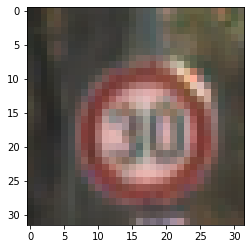

In [8]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

7

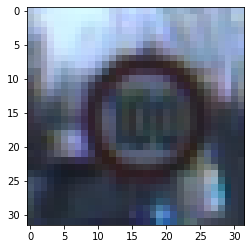

In [9]:
i = 3001
plt.imshow(X_validation[i])
y_validation[i]

29

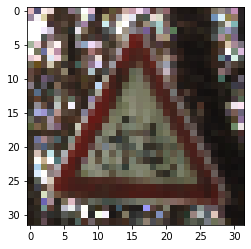

In [10]:
i = 2100
plt.imshow(X_test[i])
y_test[i]

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

In [14]:
X_test_gray.shape

(12630, 32, 32, 1)

In [15]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [16]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [17]:
X_train_gray_norm

array([[[[ 0.61458333],
         [ 0.640625  ],
         [ 0.65625   ],
         ...,
         [ 0.078125  ],
         [-0.02864583],
         [-0.01302083]],

        [[ 0.6171875 ],
         [ 0.63541667],
         [ 0.65364583],
         ...,
         [ 0.13020833],
         [ 0.19010417],
         [ 0.31510417]],

        [[ 0.61979167],
         [ 0.62760417],
         [ 0.64583333],
         ...,
         [ 0.4921875 ],
         [ 0.4921875 ],
         [ 0.5       ]],

        ...,

        [[-0.22395833],
         [-0.0625    ],
         [ 0.17708333],
         ...,
         [ 0.1328125 ],
         [ 0.11458333],
         [ 0.21875   ]],

        [[-0.25520833],
         [-0.3203125 ],
         [-0.09635417],
         ...,
         [ 0.13802083],
         [ 0.09635417],
         [ 0.15625   ]],

        [[-0.27864583],
         [-0.49739583],
         [-0.38020833],
         ...,
         [-0.0625    ],
         [-0.04427083],
         [-0.05208333]]],


       [[[-0.890625  ],


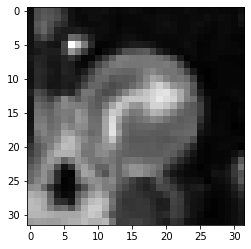

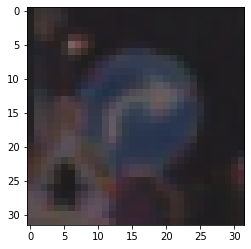

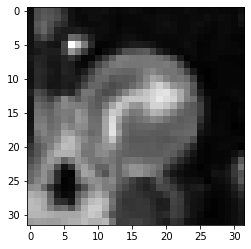

In [18]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

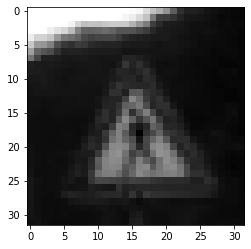

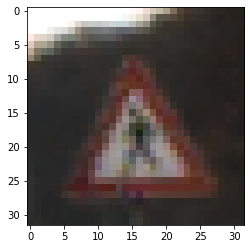

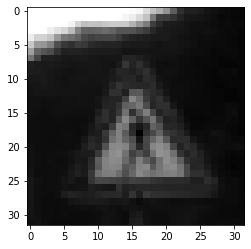

In [19]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

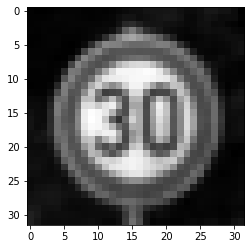

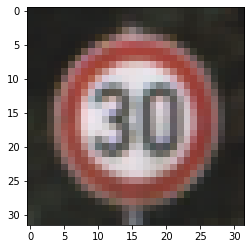

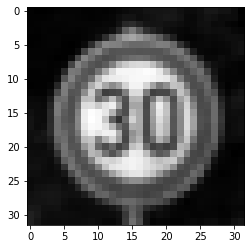

In [20]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

In [21]:
from tensorflow.keras import datasets, layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
LeNet.add(layers.AveragePooling2D())


LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation = 'relu'))

LeNet.add(layers.Dense(84, activation = 'relu'))

LeNet.add(layers.Dense(43, activation = 'softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [22]:
LeNet.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
history = LeNet.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 nb_epoch = 10,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 4s 108us/sample - loss: 3.0920 - accuracy: 0.2037 - val_loss: 2.5361 - val_accuracy: 0.3297
Epoch 2/10
34799/34799 [==============================] - 2s 49us/sample - loss: 1.4606 - accuracy: 0.5980 - val_loss: 1.3036 - val_accuracy: 0.6277
Epoch 3/10
34799/34799 [==============================] - 2s 48us/sample - loss: 0.7921 - accuracy: 0.7809 - val_loss: 0.9099 - val_accuracy: 0.7245
Epoch 4/10
34799/34799 [==============================] - 2s 48us/sample - loss: 0.5788 - accuracy: 0.8432 - val_loss: 0.8044 - val_accuracy: 0.7535
Epoch 5/10
34799/34799 [==============================] - 2s 48us/sample - loss: 0.4662 - accuracy: 0.8749 - val_loss: 0.7075 - val_accuracy: 0.7866
Epoch 6/10
34799/34799 [==============================] - 2s 48us/sample - loss: 0.3810 - accuracy: 0.9014 - val_loss: 0.6474 - val_accuracy: 0.8079
Epoch 7/10
34799/34799 [==============================] 

In [24]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 2s 126us/sample - loss: 0.9003 - accuracy: 0.8270
Test Accuracy: 0.8269991874694824


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

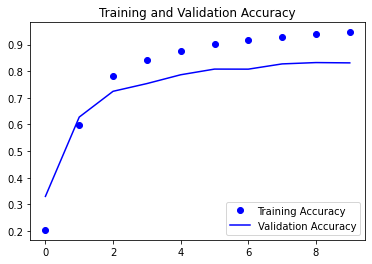

In [27]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

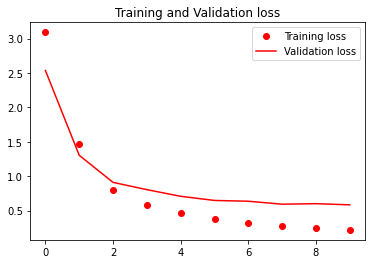

In [28]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [29]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

<AxesSubplot:>

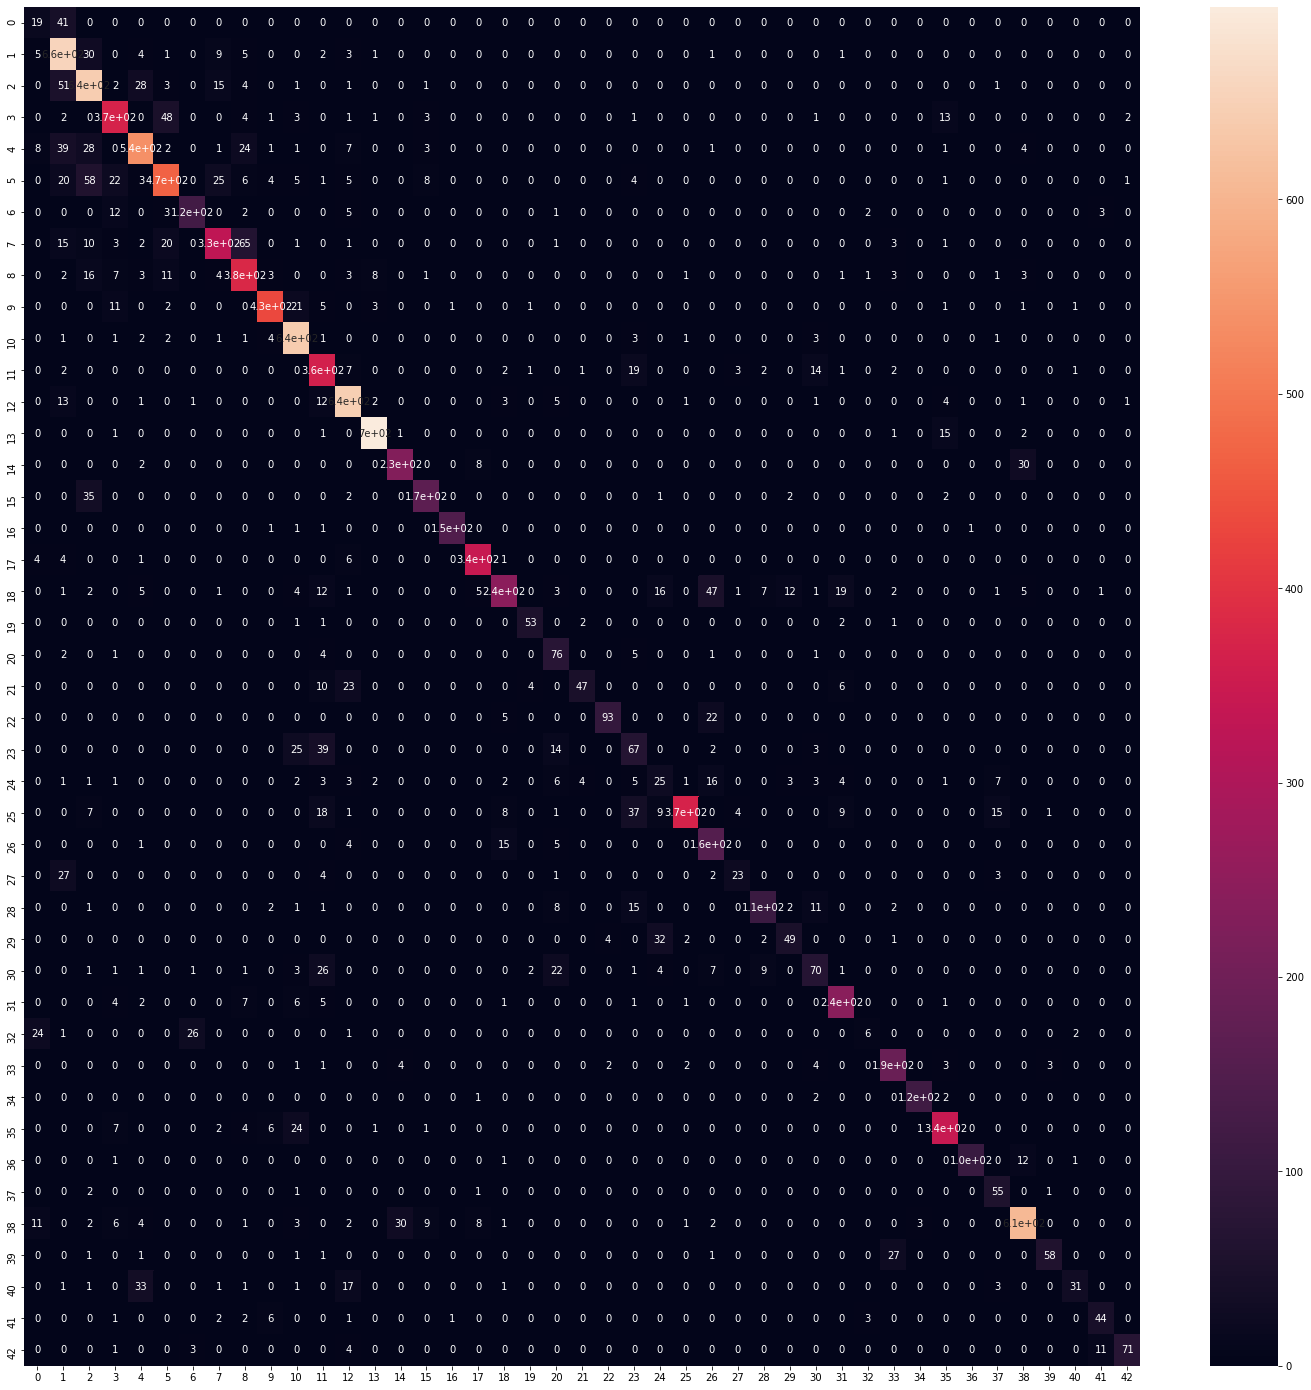

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

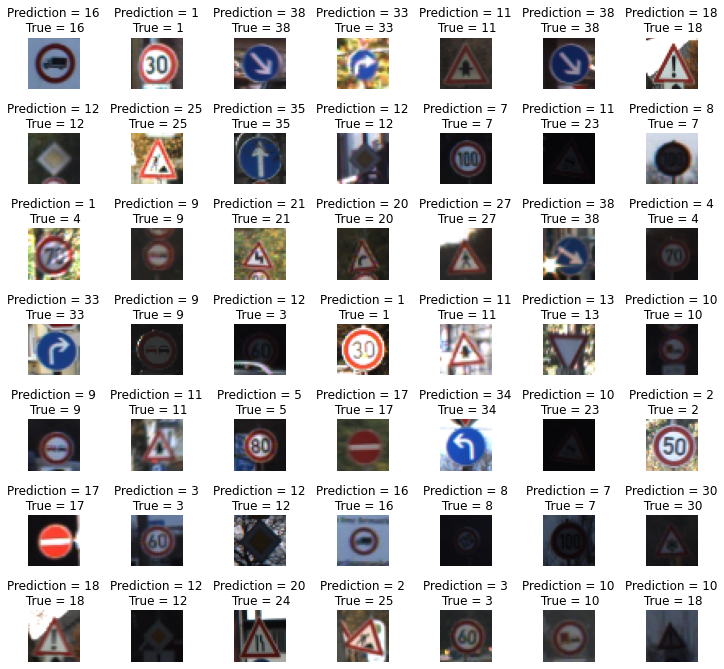

In [31]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    